# PROYECTO


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from ydata_profiling import ProfileReport
df_original = pd.read_csv('Tema_2.csv')
profile = ProfileReport(df_original, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df = pd.read_csv('Tema_2.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,NaN,3.0,NaN,250.0,0.0,0.0,187.0,0.0,3.5,NaN,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,2000.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,59.0,1.0,1.0,160.0,273.0,0.0,2.0,125.0,0.0,0.0,1.0,0.0,3.0,1.0
308,NaN,0.0,4.0,108.0,269.0,0.0,0.0,169.0,1.0,1.8,NaN,2.0,3.0,1.0
309,54.0,1.0,NaN,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,2.0
310,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3.0


#### ➤ Se evalúa la metadata y se hace el resumen:

| Columna   | Descripción                                                                                                     |
|-----------|-----------------------------------------------------------------------------------------------------------------|
| age       | Edad (en años).                                                                                                 |
| sex       | Sexo (1 = hombre; 0 = mujer).                                                                                   |
| cp        | Tipo de dolor en el pecho:                                                                                      |
|           | - 1: Angina típica                                                                                              |
|           | - 2: Angina atípica                                                                                             |
|           | - 3: Dolor no anginoso                                                                                          |
|           | - 4: Asintomático                                                                                               |
| trestbps  | Presión arterial en reposo (mm Hg al ingresar al hospital).                                                     |
| chol      | Colesterol sérico en mg/dl.                                                                                     |
| fbs       | Azúcar en sangre en ayunas (mayor de 120 mg/dl: 1 = verdadero; 0 = falso).                                      |
| restecg   | Resultados del electrocardiograma en reposo:                                                                    |
|           | - 0: Normal                                                                                                     |
|           | - 1: Anomalía en onda ST-T                                                                                      |
|           | - 2: Hipertrofia ventricular izquierda (criterio de Estes)                                                      |
| thalach   | Frecuencia cardíaca máxima alcanzada.                                                                           |
| exang     | Angina inducida por ejercicio (1 = sí; 0 = no).                                                                 |
| oldpeak   | Depresión del ST inducida por ejercicio en relación al reposo.                                                  |
| slope     | Pendiente del segmento ST en ejercicio máximo:                                                                  |
|           | - 1: Ascendente                                                                                                 |
|           | - 2: Plana                                                                                                      |
|           | - 3: Descendente                                                                                                |
| ca        | Número de vasos principales (0-3) coloreados por fluoroscopia.                                                  |
| thal      | Estado de talasemia:                                                                                            |
|           | - 3: Normal                                                                                                     |
|           | - 6: Defecto fijo                                                                                               |
|           | - 7: Defecto reversible                                                                                         |
| target    | Diagnóstico de enfermedad cardíaca (0: sin enfermedad significativa; 1 o más: enfermedad presente).             |



In [4]:
datos_faltantes = df.isnull().sum() # cantidad de datos faltantes por columna (muestra un desglose por columnas)
print(datos_faltantes)
print("-------------------")
total_faltantes = datos_faltantes.sum() # suma subtotal de los datos por columna

filas_duplicadas = df.duplicated().sum()
porcentaje_faltantes = (total_faltantes / (df.shape[0] * df.shape[1])) * 100 # shape[0] = cant filas, shape[1] = cant columnas 
porcentaje_duplicadas = (filas_duplicadas / df.shape[0]) * 100
print(f"Total de datos faltantes: {total_faltantes}")
print(f"Porcentaje de datos faltantes: {porcentaje_faltantes:.2f}%")
print(f"Cantidad de filas duplicadas: {filas_duplicadas}")
print(f"Porcentaje de filas duplicadas: {porcentaje_duplicadas:.2f}%")

age         16
sex         15
cp          17
trestbps    14
chol        15
fbs         16
restecg     15
thalach     15
exang       15
oldpeak     15
slope       16
ca          15
thal        16
target      15
dtype: int64
-------------------
Total de datos faltantes: 215
Porcentaje de datos faltantes: 4.92%
Cantidad de filas duplicadas: 10
Porcentaje de filas duplicadas: 3.21%


In [5]:
for column in df.columns:
    valores_unicos = df[column].unique()
    filas_vacias = df[column].isnull().sum()
    filas = df.shape[0]
    if filas_vacias > 0 :
        print(f'\n Valores únicos en la columna "{column}":')
        print(valores_unicos)
        porcentaje = (filas_vacias / filas) * 100
        print(f'>>> Faltantes: {filas_vacias} de un total de {filas} ({porcentaje:.2f}%). \n')
        print(f'---------')


 Valores únicos en la columna "age":
['67.0' '37.0' '41.0' '56.0' nan '57.0' '63.0' '53.0' '44.0' '52.0' '48.0'
 '54.0' '49.0' '64.0' '58.0' '60.0' '50.0' '66.0' '43.0' '40.0' '69.0'
 '59.0' '42.0' '55.0' '61.0' '65.0' '770.0' '51.0' '46.0' '62.0' '45.0'
 '39.0' '68.0' '47.0' '34.0' '71.0' '35.0' '29.0' '70.0' '77.0'
 'invalid_value' '38.0' '74.0']
>>> Faltantes: 16 de un total de 312 (5.13%). 

---------

 Valores únicos en la columna "sex":
[ 1. nan  0.]
>>> Faltantes: 15 de un total de 312 (4.81%). 

---------

 Valores únicos en la columna "cp":
[ 4.  3.  2.  1. nan]
>>> Faltantes: 17 de un total de 312 (5.45%). 

---------

 Valores únicos en la columna "trestbps":
[ 160.  120.   nan  130. 2000.  140.  172.  150.  110.  132.  117.  135.
  105.  112.  124.  125.  142.  128.  145.  170.  155.  104.  180.  138.
  108.  134.  122.  115.  118.  100.  200.   94.  165.  102.  152.  101.
  126.  174.  148.  178.  158.  192.  129.  144.  123.  136.  146.  106.
  156.  154.  114.]
>>> Falt

In [6]:
columnas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
columnas_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for columna in columnas_numericas + columnas_categoricas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce') #forzamos que todos sean numericos 

# valores faltantes en columnas numéricas reemplazados con la mediana
for columna in columnas_numericas:
    mediana = df[columna].median()
    df[columna].fillna(mediana, inplace=True)

#valores faltantes en columnas categóricas reemplazados con la moda
for columna in columnas_categoricas:
    moda = df[columna].mode()[0]
    df[columna].fillna(moda, inplace=True)

# verificar valores faltantes 
datos_faltantes = df.isnull().sum()
print("Valores faltantes después de la imputación:\n", datos_faltantes)

Valores faltantes después de la imputación:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


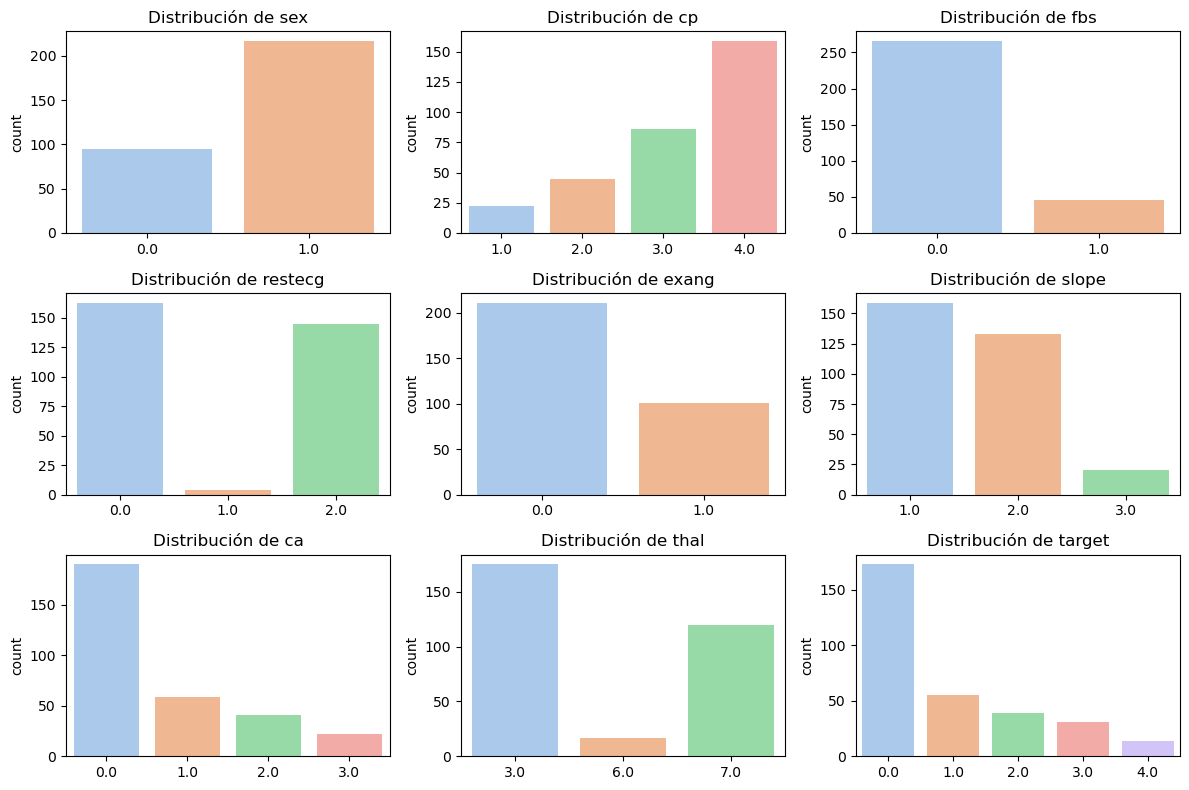

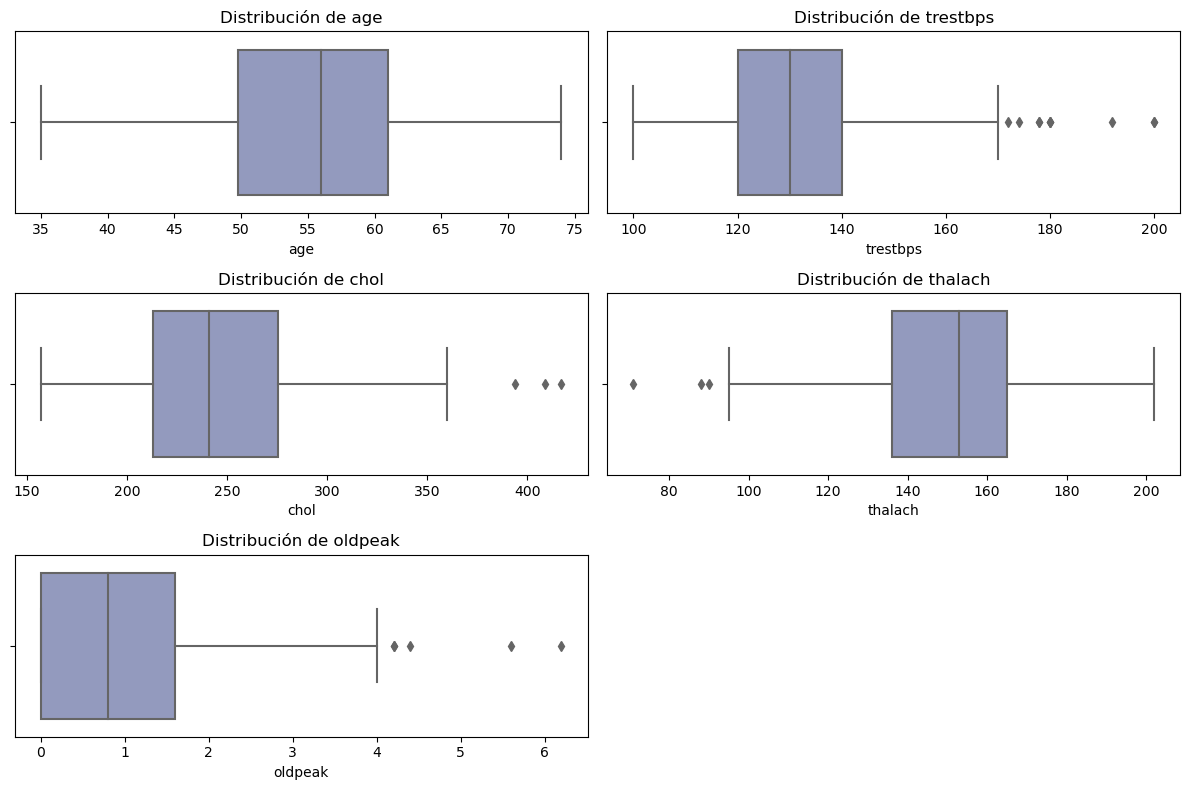

In [10]:
# vamos a ver para cada variable, la distribucion y frecuencia de los valores
plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=columna, palette='pastel')
    plt.title(f'Distribución de {columna}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=columna, palette='BuPu')
    plt.title(f'Distribución de {columna}')
plt.tight_layout()
plt.show()

Viendo estos graficos de las variables numericas, vemos datos que son imposibles de tener, como por ejemplo una persona con edad mayor a 700 años, o con el colesterol en sangre a niveles mayores de 5000. Esto puede darse por errores humanos al registrar los datos. Vamos a corregir estos valores y suplantarlos por la mediana de dicha variable.

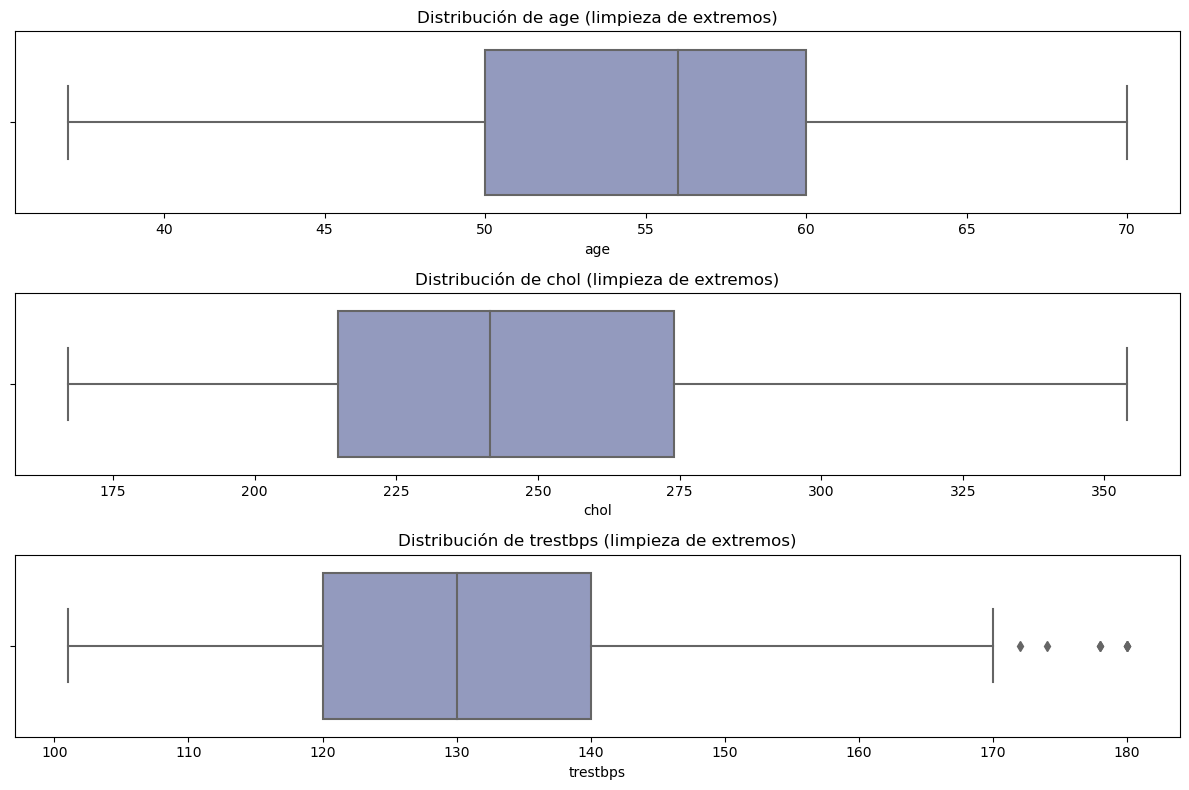

In [11]:
def reemplazar_extremos(df, columna):
    # Calculamos los percentiles 1% y 99%
    q1 = df[columna].quantile(0.01)
    q99 = df[columna].quantile(0.99)
    # Calculamos la media de la columna
    media = df[columna].mean()
    # Reemplazamos valores fuera del rango [q1, q99] por la media
    df[columna] = np.where((df[columna] < q1) | (df[columna] > q99), media, df[columna])

columnas_arregladas = ['age', 'chol', 'trestbps']
for columna in columnas_arregladas:
    reemplazar_extremos(df, columna)

plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_arregladas, 1):
    plt.subplot(3, 1, i)  # Ajustamos el número de filas a 3 para una sola columna
    sns.boxplot(data=df, x=columna, palette='BuPu')
    plt.title(f'Distribución de {columna} (limpieza de extremos)')
plt.tight_layout()
plt.show()


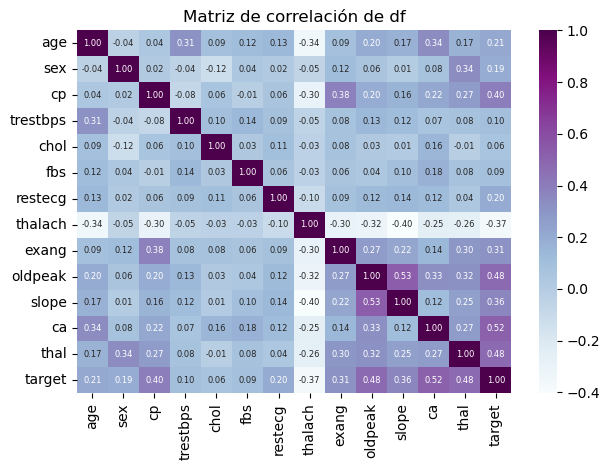

In [12]:
%matplotlib inline
fig, ax = plt.subplots()
sns.heatmap(df.corr(), fmt='.2f', annot=True, annot_kws={"size": 6}, cmap='BuPu', ax=ax)
ax.set_title('Matriz de correlación de df')

# Asegurar que el texto en cada celda esté centrado
for text in ax.texts:
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')

fig.tight_layout()

#### No se observan muchas correlaciones extremadamente altas (como mayores a 0.7) entre las variables continuas que justificarían inmediatamente un PCA. Sin embargo, algunas variables continuas como thalach, oldpeak, y age tienen correlaciones moderadas con otras, lo que sugiere que podrían agruparse parcialmente en componentes para reducir la dimensionalidad si fuera necesario.

#### Por lo tanto, procedemos a la construcción del modelo predictivo sin el PCA.

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Definir columnas numéricas y categóricas
columnas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
columnas_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Preprocesamiento: Estandarizar variables numéricas y One-Hot Encoding para categóricas
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(), columnas_categoricas)
    ])

# Crear el pipeline con SMOTE y RandomForest
pipeline = Pipeline(steps=[
    ('preprocesador', preprocesador),
    ('smote', SMOTE(random_state=42)),
    ('clasificador', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de hiperparámetros para la búsqueda
param_grid = {
    'clasificador__n_estimators': [100, 200],
    'clasificador__max_depth': [None, 20, 30],
    'clasificador__min_samples_split': [2, 5],
    'clasificador__min_samples_leaf': [1, 2]
}

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener y mostrar los mejores parámetros y el mejor puntaje de precisión
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión durante la validación cruzada:", grid_search.best_score_)

# Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Imprimir resultados de precisión y reporte de clasificación
print("Precisión con el mejor modelo:", accuracy_score(y_test, y_pred_best))
print("Reporte de Clasificación con el mejor modelo:\n", classification_report(y_test, y_pred_best))

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (/Users/sophiaguerra/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py)